In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [15]:
# create a correlation matrix
# light below
# aerobic 160 bpm
# anaerobic 175 bpm

# load data
df = pd.read_csv('./HW4 Data/project_data.csv')
df.head()

,s,Type of Exercise,Duration of Exercise,Intensity,Heartrate,Time of Day of Exercise,Sleep Quality (out of 10),Sleep Time
0,2/7,Arms and Shoulders,2 hr 0 min,Moderate,150.0,7:00 PM,6.50,7 hr 45 min
1,2/8,Legs,1 hr 15 min,Intense,184.0,1:00 PM,8.00,9 hrs 0 min
2,2/9,Running,0 hr 25 min,Intense,190.0,6:00 PM,7.00,7 hrs 0 min
3,2/10,Rest,NaN,NaN,NaN,NaN,7.00,7 hrs 15 min
4,2/11,Chest and Back,1 hr 30 min,Moderate,143.0,5:00 PM,5.75,7 hr 20 min


Correlation Matrix:
                           Heartrate  Sleep Quality (out of 10)  \
Heartrate                   1.000000                   0.621570   
Sleep Quality (out of 10)   0.621570                   1.000000   
Sleep Time (Hours)          0.076186                   0.234288   

                           Sleep Time (Hours)  
Heartrate                            0.076186  
Sleep Quality (out of 10)            0.234288  
Sleep Time (Hours)                   1.000000  


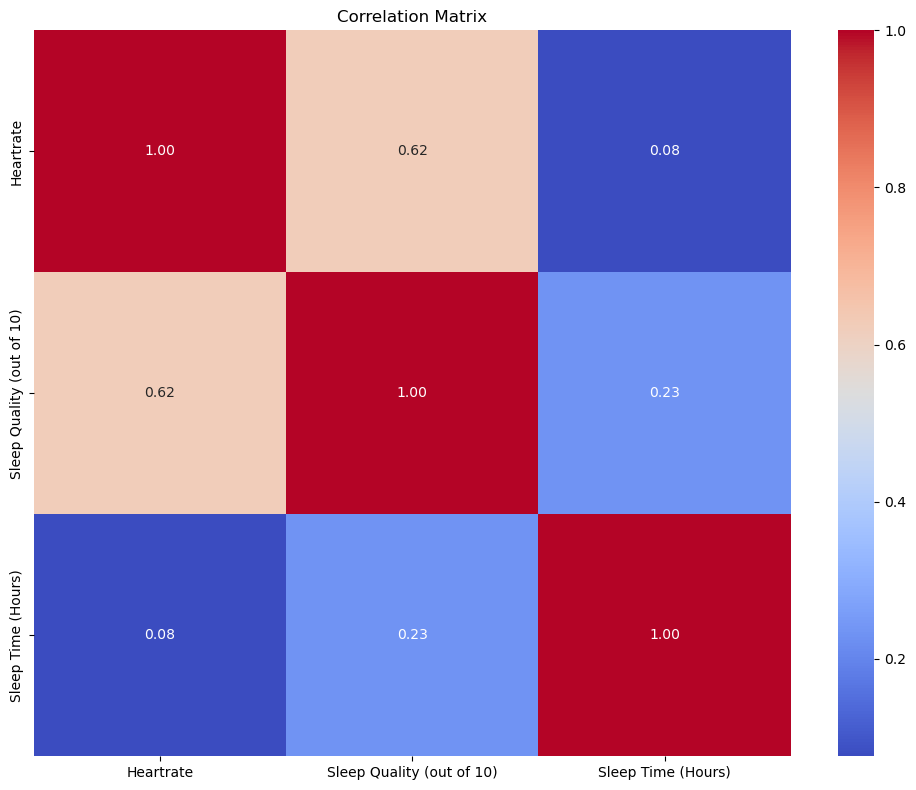

In [16]:
# Function to convert time in the format 'X hr Y min' to numerical value in hours
def time_to_hours(time):
    time_parts = time.split(' ')
    if len(time_parts) == 4:  # Format like "7 hr 45 min"
        hours = int(time_parts[0])
        minutes = int(time_parts[2])
        total_hours = hours + minutes / 60
        return total_hours
    elif len(time_parts) == 3 and time_parts[1] == 'hrs':  # Format like "9 hrs 0 min"
        hours = int(time_parts[0])
        minutes = int(time_parts[2])
        total_hours = hours + minutes / 60
        return total_hours
    elif len(time_parts) == 3 and time_parts[1] == 'hr':  # Format like "5 hr 0 min"
        hours = int(time_parts[0])
        minutes = int(time_parts[2])
        total_hours = hours + minutes / 60
        return total_hours
    elif len(time_parts) == 2 and time_parts[1].startswith('hr'):  # Format like "8hr 0 min"
        try:
            hours = int(time_parts[0])
            return hours
        except:
            return 0
    else:
        return 0

# Create a new DataFrame with only the columns we need
features_df = df[['Heartrate', 'Sleep Quality (out of 10)', 'Sleep Time']].dropna()

# Convert sleep time to hours
features_df['Sleep Time (Hours)'] = features_df['Sleep Time'].apply(time_to_hours)

# Drop the original Sleep Time column
features_df = features_df.drop(columns=['Sleep Time'])

# Calculate the correlation matrix
corr_matrix_new = features_df.corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(corr_matrix_new)

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_new, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()


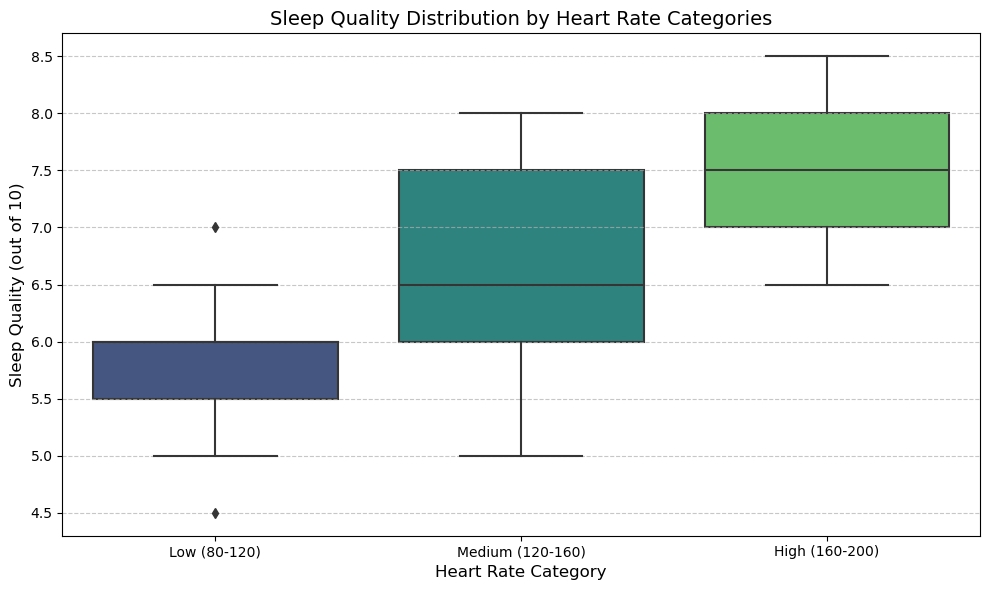

Average Sleep Quality by Heart Rate Category:
HR_Category
Low (80-120)        5.802083
Medium (120-160)    6.602273
High (160-200)      7.468750
Name: Sleep Quality (out of 10), dtype: float64


In [17]:
# Create heart rate categories
bins = [80, 120, 160, 200]
labels = ['Low (80-120)', 'Medium (120-160)', 'High (160-200)']
features_df['HR_Category'] = pd.cut(features_df['Heartrate'], bins=bins, labels=labels)

# Create box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='HR_Category', y='Sleep Quality (out of 10)', data=features_df, palette='viridis')
plt.title('Sleep Quality Distribution by Heart Rate Categories', fontsize=14)
plt.xlabel('Heart Rate Category', fontsize=12)
plt.ylabel('Sleep Quality (out of 10)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Display mean sleep quality for each heart rate category
category_means = features_df.groupby('HR_Category')['Sleep Quality (out of 10)'].mean()
print("Average Sleep Quality by Heart Rate Category:")
print(category_means)

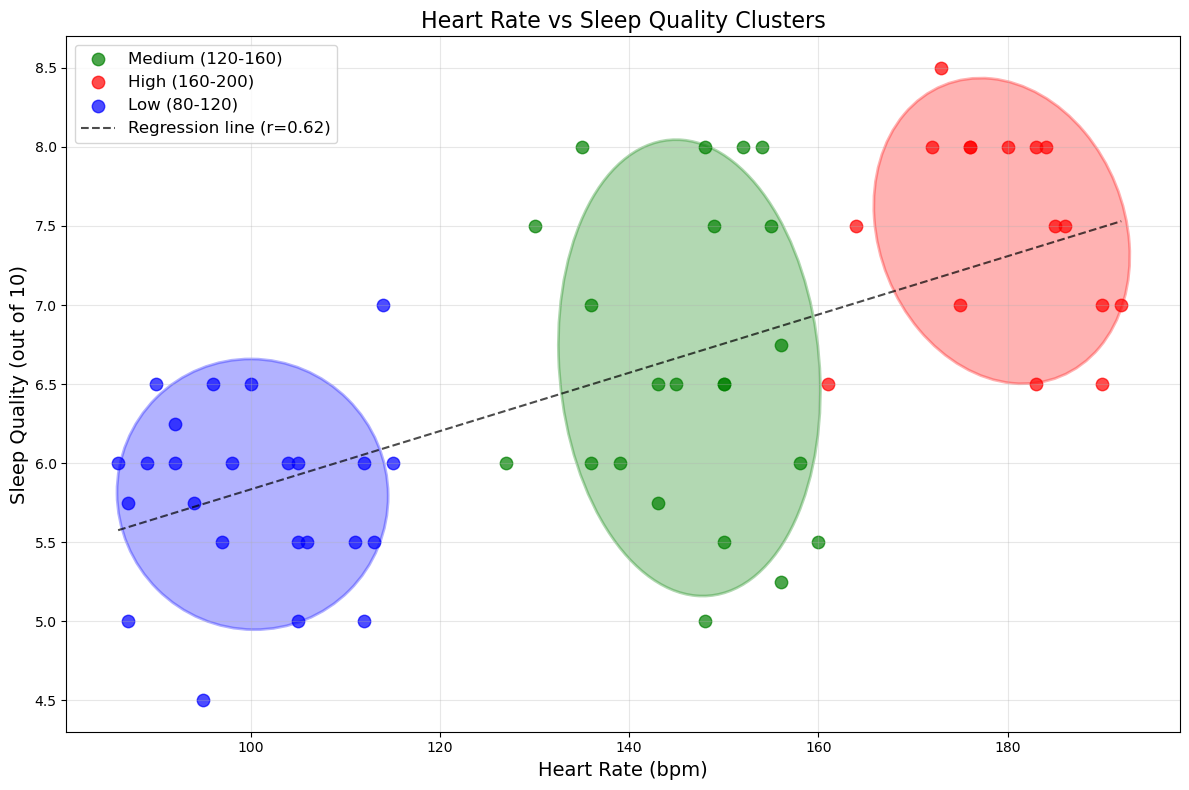

Statistics for each heart rate category cluster:

Medium (120-160):
  Count: 22
  Mean Sleep Quality: 6.60
  Mean Heart Rate: 146.36
  Sleep Quality Range: 5.00 - 8.00

High (160-200):
  Count: 16
  Mean Sleep Quality: 7.47
  Mean Heart Rate: 179.38
  Sleep Quality Range: 6.50 - 8.50

Low (80-120):
  Count: 24
  Mean Sleep Quality: 5.80
  Mean Heart Rate: 100.21
  Sleep Quality Range: 4.50 - 7.00


In [18]:
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms

# Create a scatter plot with heart rate categories
plt.figure(figsize=(12, 8))

# Colors for each category
colors = {'Low (80-120)': 'blue', 'Medium (120-160)': 'green', 'High (160-200)': 'red'}

# Plot each category with different colors
for category in features_df['HR_Category'].unique():
    subset = features_df[features_df['HR_Category'] == category]
    plt.scatter(subset['Heartrate'], subset['Sleep Quality (out of 10)'], 
                c=colors[category], label=category, alpha=0.7, s=80)

# Function to create confidence ellipses
def confidence_ellipse(x, y, ax, n_std=2.0, facecolor='none', **kwargs):
    """
    Create a plot of the covariance confidence ellipse of *x* and *y*.
    """
    if x.size != y.size:
        raise ValueError("x and y must be the same size")

    cov = np.cov(x, y)
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    
    # Using a special case to handle perfect correlation
    if abs(pearson) > 0.999:
        pearson = np.sign(pearson) * 0.999
        
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0), width=ell_radius_x * 2, height=ell_radius_y * 2, 
                      facecolor=facecolor, **kwargs)
    
    # Scale in data coordinates
    scale_x = np.sqrt(cov[0, 0]) * n_std
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_x = np.mean(x)
    mean_y = np.mean(y)
    
    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)
    
    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)

# Add confidence ellipses for each category
ax = plt.gca()
for category, color in colors.items():
    subset = features_df[features_df['HR_Category'] == category]
    confidence_ellipse(subset['Heartrate'].values, subset['Sleep Quality (out of 10)'].values, 
                        ax, n_std=1.5, edgecolor=color, lw=2, alpha=0.3, 
                        facecolor=color)

# Add regression line
plt.plot(x_pred, y_pred, 'k--', alpha=0.7, label=f'Regression line (r={r_value:.2f})')

plt.title('Heart Rate vs Sleep Quality Clusters', fontsize=16)
plt.xlabel('Heart Rate (bpm)', fontsize=14)
plt.ylabel('Sleep Quality (out of 10)', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=12)
# plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.viridis), 
#              label='Heart Rate (bpm)')
plt.tight_layout()
plt.show()

# Print statistics for each cluster
print("Statistics for each heart rate category cluster:")
for category in features_df['HR_Category'].unique():
    subset = features_df[features_df['HR_Category'] == category]
    print(f"\n{category}:")
    print(f"  Count: {len(subset)}")
    print(f"  Mean Sleep Quality: {subset['Sleep Quality (out of 10)'].mean():.2f}")
    print(f"  Mean Heart Rate: {subset['Heartrate'].mean():.2f}")
    print(f"  Sleep Quality Range: {subset['Sleep Quality (out of 10)'].min():.2f} - {subset['Sleep Quality (out of 10)'].max():.2f}")

In [22]:
from scipy import stats

# Perform a hypothesis test to see if heart rate significantly affects sleep quality

# First, let's visualize the relationship with a scatter plot and regression line
# plt.figure(figsize=(10, 6))
# plt.scatter(features_df['Heartrate'], features_df['Sleep Quality (out of 10)'], alpha=0.7)
# plt.plot(x_pred, y_pred, 'r-', linewidth=2)
# plt.title('Heart Rate vs Sleep Quality with Regression Line')
# plt.xlabel('Heart Rate (bpm)')
# plt.ylabel('Sleep Quality (out of 10)')
# plt.grid(True, alpha=0.3)

# # Annotate the plot with regression statistics
# equation_text = f'y = {slope:.4f}x + {intercept:.4f}'
# r_squared_text = f'R² = {r_value**2:.4f}'
# p_value_text = f'p-value = {p_value:.8f}'

# plt.annotate(equation_text + '\n' + r_squared_text + '\n' + p_value_text, 
#              xy=(0.05, 0.95), xycoords='axes fraction',
#              bbox=dict(boxstyle='round', facecolor='white', alpha=0.7),
#              verticalalignment='top')

# plt.tight_layout()
# plt.show()

# Perform a t-test between heart rate categories

# Get data for each heart rate category
low_hr = features_df[features_df['HR_Category'] == 'Low (80-120)']['Sleep Quality (out of 10)']
medium_hr = features_df[features_df['HR_Category'] == 'Medium (120-160)']['Sleep Quality (out of 10)']
high_hr = features_df[features_df['HR_Category'] == 'High (160-200)']['Sleep Quality (out of 10)']

# Perform t-tests between groups
low_med_ttest = stats.ttest_ind(low_hr, medium_hr, equal_var=False)
med_high_ttest = stats.ttest_ind(medium_hr, high_hr, equal_var=False)
low_high_ttest = stats.ttest_ind(low_hr, high_hr, equal_var=False)

# Print results
print("\nHypothesis Test Results:")
print(f"T-test between Low HR and Medium HR: t={low_med_ttest.statistic:.4f}, p={low_med_ttest.pvalue:.6f}")
print(f"T-test between Medium HR and High HR: t={med_high_ttest.statistic:.4f}, p={med_high_ttest.pvalue:.6f}")
print(f"T-test between Low HR and High HR: t={low_high_ttest.statistic:.4f}, p={low_high_ttest.pvalue:.6f}")

# Perform ANOVA
anova_result = stats.f_oneway(low_hr, medium_hr, high_hr)
print(f"\nANOVA test across all HR categories: F={anova_result.statistic:.4f}, p={anova_result.pvalue:.8f}")

# Conclusion based on statistical tests
alpha = 0.05
print("\nConclusion:")
if p_value < alpha:
    print(f"The regression analysis shows a significant relationship between heart rate and sleep quality (p={p_value:.8f} < {alpha}).")
    print(f"For every 1 bpm increase in heart rate, sleep quality increases by {slope:.4f} points on average.")
    print(f"Heart rate explains {r_value**2:.2%} of the variation in sleep quality (R² = {r_value**2:.4f}).")
else:
    print(f"The regression analysis does not show a significant relationship (p={p_value:.8f} > {alpha}).")

if anova_result.pvalue < alpha:
    print(f"The ANOVA test confirms that there are significant differences in sleep quality between heart rate categories (p={anova_result.pvalue:.8f} < {alpha}).")
else:
    print(f"The ANOVA test does not show significant differences between heart rate categories (p={anova_result.pvalue:.8f} > {alpha}).")


Hypothesis Test Results:
T-test between Low HR and Medium HR: t=-3.3906, p=0.001800
T-test between Medium HR and High HR: t=-3.3205, p=0.002075
T-test between Low HR and High HR: t=-8.3797, p=0.000000

ANOVA test across all HR categories: F=23.9274, p=0.00000002

Conclusion:
The regression analysis shows a significant relationship between heart rate and sleep quality (p=0.00000007 < 0.05).
For every 1 bpm increase in heart rate, sleep quality increases by 0.0184 points on average.
Heart rate explains 38.63% of the variation in sleep quality (R² = 0.3863).
The ANOVA test confirms that there are significant differences in sleep quality between heart rate categories (p=0.00000002 < 0.05).
